## 1. **EDA**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [3]:
! wget -p data/ http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Arts_Crafts_and_Sewing.json.gz

--2020-02-25 02:36:33--  http://data/
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
--2020-02-25 02:36:33--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Arts_Crafts_and_Sewing.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306424435 (292M) [application/octet-stream]
Saving to: ‘deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Arts_Crafts_and_Sewing.json.gz’

deepyeti.ucsd.edu/j 100%[===================>] 292.23M  5.61MB/s    in 52s     

2020-02-25 02:37:26 (5.59 MB/s) - ‘deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Arts_Crafts_and_Sewing.json.gz’ saved [306424435/306424435]

FINISHED --2020-02-25 02:37:26--
Total wall clock time: 53s
Downloaded: 1 files, 292M in 52s (5.59 MB/s)


Mounting Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
pip install pyspark

     |████████████████████████████████| 217.8MB 58kB/s 
     |████████████████████████████████| 204kB 37.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=74cc8e6586f3f895d9c488541869dd4824adad138e94de7aa2a18db3e551fc77
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [0]:
APP_NAME = "Exploratory_Data_Analysis"
SPARK_URL = "local[*]"

In [0]:
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()

In [0]:
data = spark.read.json('/content/drive/My Drive/Arts_Crafts_and_Sewing.json.gz') 

**Reading Columns**

In [10]:
data.columns

['asin',
 'image',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'style',
 'summary',
 'unixReviewTime',
 'verified',
 'vote']

Looking the Structure of Data

In [11]:
data.show()

+----------+-----+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|               style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------+--------+----+
|0449819906| null|    5.0|I've read this bo...| 11 6, 2013|A3U4E9PIZ8OWH1|      Shirley Curtis|[,,,,,,  Kindle E...|   A  WONDERFUL BOOK|    1383696000|    true|   4|
|0449819906| null|    5.0|Nicely written di...|02 28, 2017|A3945D2TJ0PI86|            M. Smith|[,,,,,,  Kindle E...|                Nice|    1488240000|    true|null|
|0449819906| null|    5.0|             love it|02 25, 2017|A2WZK72HLQ7SPT|     Amazon Customer|[,,,,,,  Paperbac...|          Five Stars|    1487980800|    true|null

In [12]:
data.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Color Name:: string (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Design:: string (nullable = true)
 |    |-- Display Height:: string (nullable = true)
 |    |-- Edition:: string (nullable = true)
 |    |-- Flavor:: string (nullable = true)
 |    |-- Format:: string (nullable = true)
 |    |-- Item Display Length:: string (nullable = true)
 |    |-- Item Display Weight:: string (nullable = true)
 |    |-- Item Package Quantity:: string (nullable = true)
 |    |-- Length:: string (nullable = true)
 |    |-- Material Type:: string (nullable = true)
 |    |-- Material:: string (nullable = t

**1.Graphical Representation of Overall**

In [13]:
overallCountsDF = (data
               .groupBy('overall').count())
overallCountsDF.show()

+-------+-------+
|overall|  count|
+-------+-------+
|    1.0| 210232|
|    4.0| 361840|
|    3.0| 198200|
|    2.0| 120994|
|    5.0|1984651|
+-------+-------+



In [0]:
Overalldf = pd.DataFrame({
    '1.0': [210232],
    '2.0': [120994],
    '3.0': [198200],
    '4.0': [361840],
    '5.0': [1984651]})

Text(0, 0.5, 'Count')

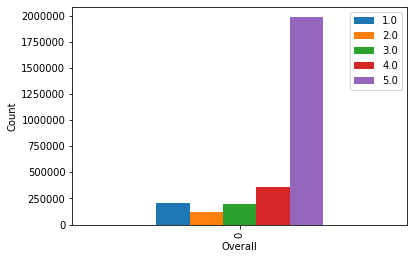

In [17]:
Overalldf.plot(kind='bar')
plt.xlabel('Overall')
plt.ylabel('Count')

**2.Getting the count of most common words**




In [18]:
AllReviews = data.select(concat(data.reviewText).alias('word'))
AllReviews.show()

+--------------------+
|                word|
+--------------------+
|I've read this bo...|
|Nicely written di...|
|             love it|
|Good additional k...|
|A gazillion patte...|
|Just ok. Read bet...|
|The best knitting...|
|This book is a mo...|
|excellent variety...|
|Another winner M....|
|Love all the patt...|
|Good selection of...|
|Contains some int...|
|Super useful for ...|
|Loved it. Differe...|
|I love the book b...|
|Awesome book!!! A...|
|   Lots of stitches.|
|Easy to follow al...|
|I'm a fairly expe...|
+--------------------+
only showing top 20 rows



a.Splitting the sentences into words

In [20]:
from pyspark.sql.functions import split, explode
AllWordsDF = (data
                .select(explode(split('reviewText',' ')).alias('word')).where(length('word')>0))

AllWordsDF.show()
shakeWordsDFCount = AllWordsDF.count()
print(shakeWordsDFCount)

+---------+
|     word|
+---------+
|     I've|
|     read|
|     this|
|     book|
|  already|
|      and|
|     I've|
|      got|
|    plans|
|      for|
|    using|
|       it|
|       in|
|   future|
|projects.|
|      I'm|
|DELIGHTED|
|     with|
|      the|
| patterns|
+---------+
only showing top 20 rows

82453141


In [21]:
def wordCount(wordListDF):
    
    return wordListDF.groupBy('word').count()

wordCount(AllWordsDF).show()

+--------------+------+
|          word| count|
+--------------+------+
|          some|150323|
|         those| 29757|
|           few| 63803|
|     involving|   265|
|    creativity|   817|
|     recognize|   363|
|      Previous|    99|
|            By|  2630|
|        hobby,|   381|
|           art| 30993|
|     traveling|  1884|
|        online|  8651|
|        travel|  7480|
|         still| 72752|
|illustrations,|    61|
|          hope| 10713|
|        harder|  4910|
|      cleanly,|   330|
|      everyday|  2954|
|       shares.|     5|
+--------------+------+
only showing top 20 rows



In [22]:
from pyspark.sql.functions import desc
topWordsAndCountsDF = wordCount(AllWordsDF).orderBy('count',ascending=False)
topWordsAndCountsDF.show()

+----+-------+
|word|  count|
+----+-------+
| the|3033099|
|   I|2782401|
| and|2293624|
|  to|2171776|
|   a|1941199|
| for|1374924|
|  it|1308956|
|  of|1148370|
|  is|1084258|
|  my| 833512|
|this| 825819|
|  in| 733414|
|with| 727151|
| was| 684681|
| are| 651131|
|  on| 631537|
| but| 597462|
|that| 593801|
|have| 554748|
| not| 518515|
+----+-------+
only showing top 20 rows



**3.Categorizing the length of reviews**

In [24]:
ReviewLengthsDF = AllReviews.select(length('word').alias('length'))
ReviewLengthsDF.show()

+------+
|length|
+------+
|   408|
|    26|
|     7|
|   236|
|   337|
|    32|
|   118|
|   196|
|    37|
|    25|
|    75|
|   148|
|    35|
|   178|
|    43|
|    60|
|    28|
|    17|
|    98|
|  2221|
+------+
only showing top 20 rows



In [25]:
mean_length=ReviewLengthsDF.select(mean('length')).show()

+----------------+
|     avg(length)|
+----------------+
|154.263091953851|
+----------------+



In [27]:
DataCategory = ReviewLengthsDF.withColumn("length", when(ReviewLengthsDF.length > 154.263091953851,
                                  "Long").otherwise("Short"))
DataCategory.show(35)

+------+
|length|
+------+
|  Long|
| Short|
| Short|
|  Long|
|  Long|
| Short|
| Short|
|  Long|
| Short|
| Short|
| Short|
| Short|
| Short|
|  Long|
| Short|
| Short|
| Short|
| Short|
| Short|
|  Long|
| Short|
|  Long|
| Short|
|  Long|
|  Long|
| Short|
| Short|
| Short|
| Short|
| Short|
| Short|
| Short|
|  Long|
|  Long|
|  Long|
+------+
only showing top 35 rows



In [28]:
CategoryDF=DataCategory.groupBy('length').count()
CategoryDF.show()


+------+-------+
|length|  count|
+------+-------+
|  Long| 853416|
| Short|2022501|
+------+-------+



In [0]:
CategoryDF1= pd.DataFrame({
    'Short': [2022501],
    'Long': [853416],})

Text(0, 0.5, 'Count')

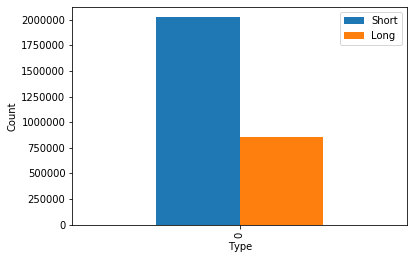

In [32]:
CategoryDF1.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')